<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/ImageColoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [ ]:
SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger images.
img_data=[]
img=cv2.imread('/content/drive/MyDrive/datasets/einstein.jpg', 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [ ]:
img_data2=[]  #Second image to be provided as ground truth.
img2=cv2.imread('/content/drive/MyDrive/datasets/monalisa.jpg', 1)   #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))
img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

In [ ]:
from PIL import Image

In [ ]:
# Define Autoencoder model.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [ ]:
model.fit(img_array, img_array2,
        epochs=1000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.0963 - accuracy: 0.6338
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0934 - accuracy: 0.6301
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0886 - accuracy: 0.8117
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0826 - accuracy: 0.9230
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0754 - accuracy: 0.9649
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0676 - accuracy: 0.9778
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0603 - accuracy: 0.9819
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0563 - accuracy: 0.9859
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0587 - accuracy: 0.9868
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0608 - accuracy: 0.9871
Epoch 11/

Output


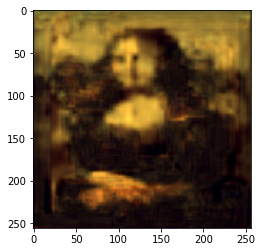

In [ ]:
#Shuffle data for each epoch
print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.
#In reality, train on 1000s of input images and predict on images that the training
#algorithm never saw.
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")
img2 = Image.fromarray(pred[0], 'RGB')
img2.save("processed_img.jpg")